In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1688,2020-09-19,United Kingdom,384690.0,385936.0,41753.0,41732.0,-1246.0,21.0
1689,2020-09-19,Germany,269651.0,270070.0,9386.0,9384.0,-419.0,2.0
1690,2020-09-19,Iran,416354.0,416198.0,24014.0,23952.0,156.0,62.0
1691,2020-09-19,Turkey,299416.0,299810.0,7365.0,7377.0,-394.0,-12.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  10338.47135262847
RMSE =  38410.927813460126


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  310.03898405197873
RMSE =  770.0463805732121


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  75081.725
RMSE =  121198.80956707042
-- World performances for deaths --
MAE =  1810.56875
RMSE =  2198.353405108014


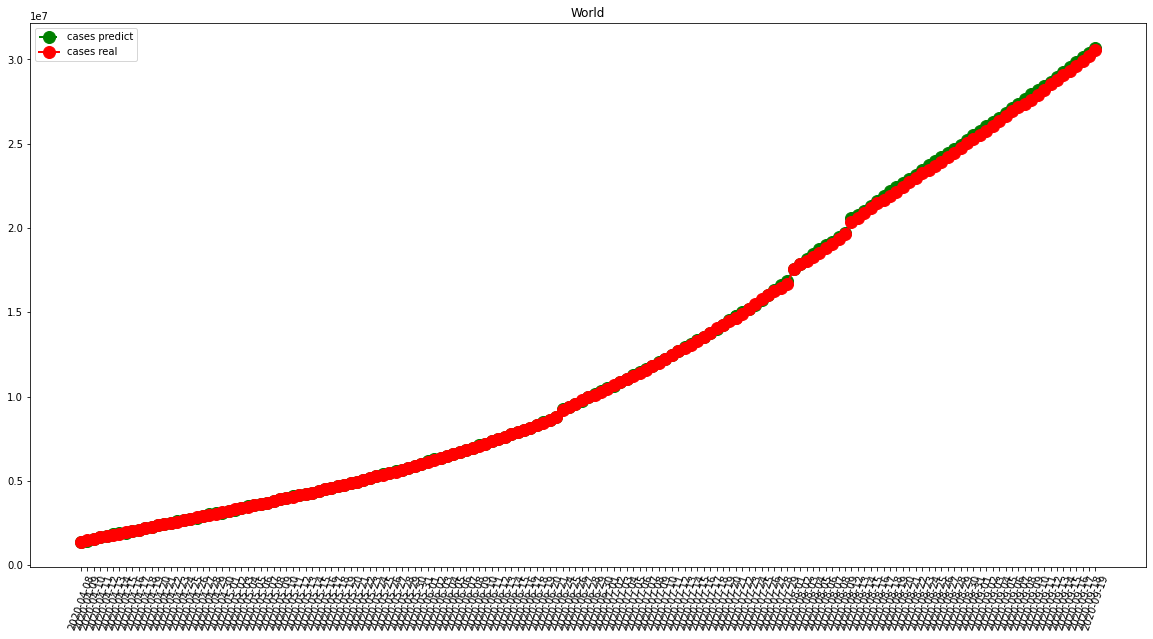

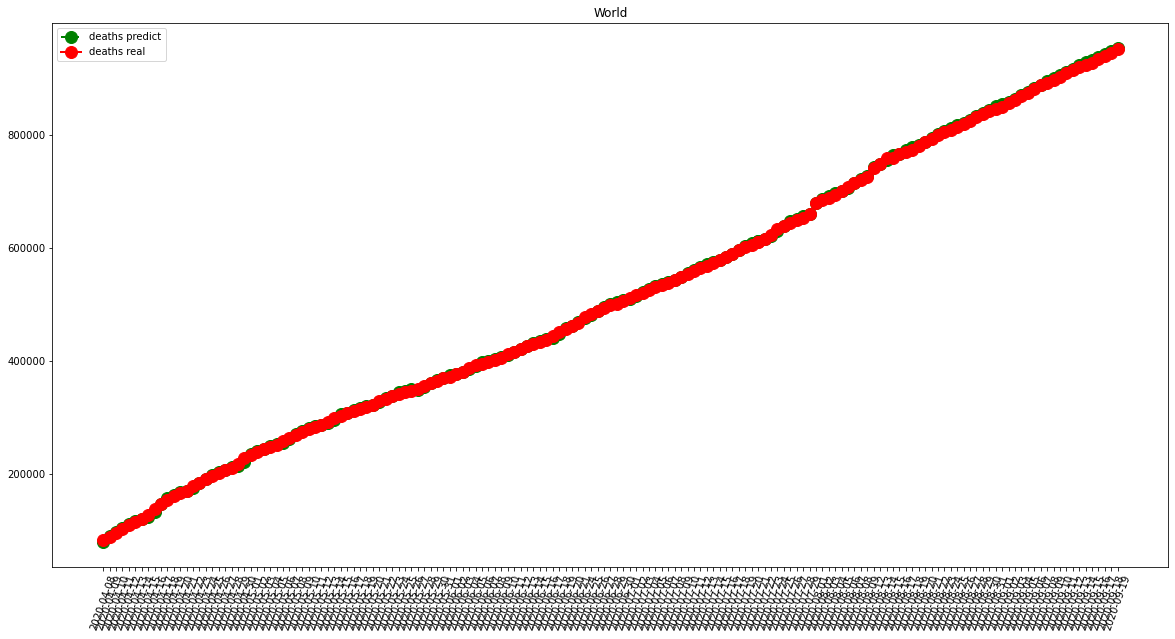

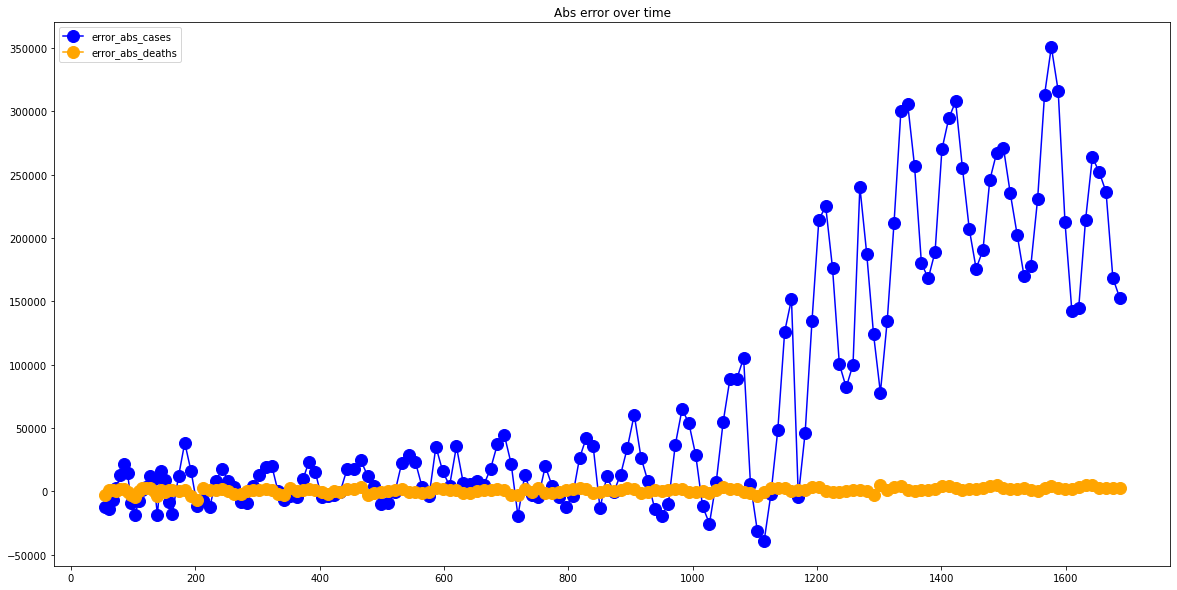

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1143.5588235294117
RMSE =  1680.7335775855522
-- France performances for deaths --
MAE =  112.4235294117647
RMSE =  257.52573829105495


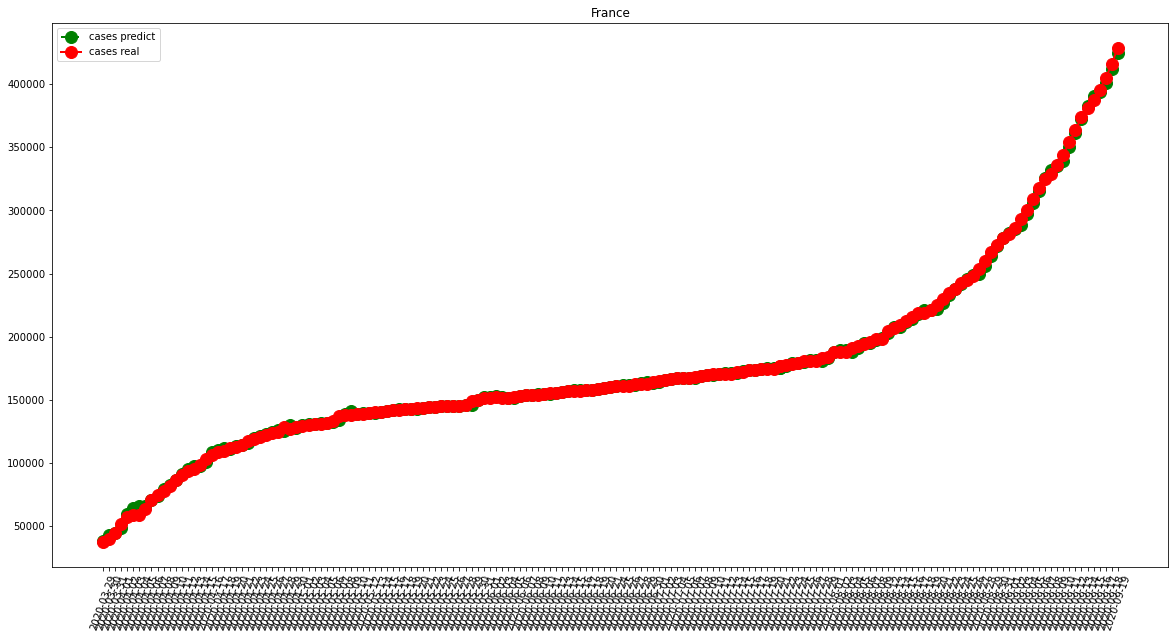

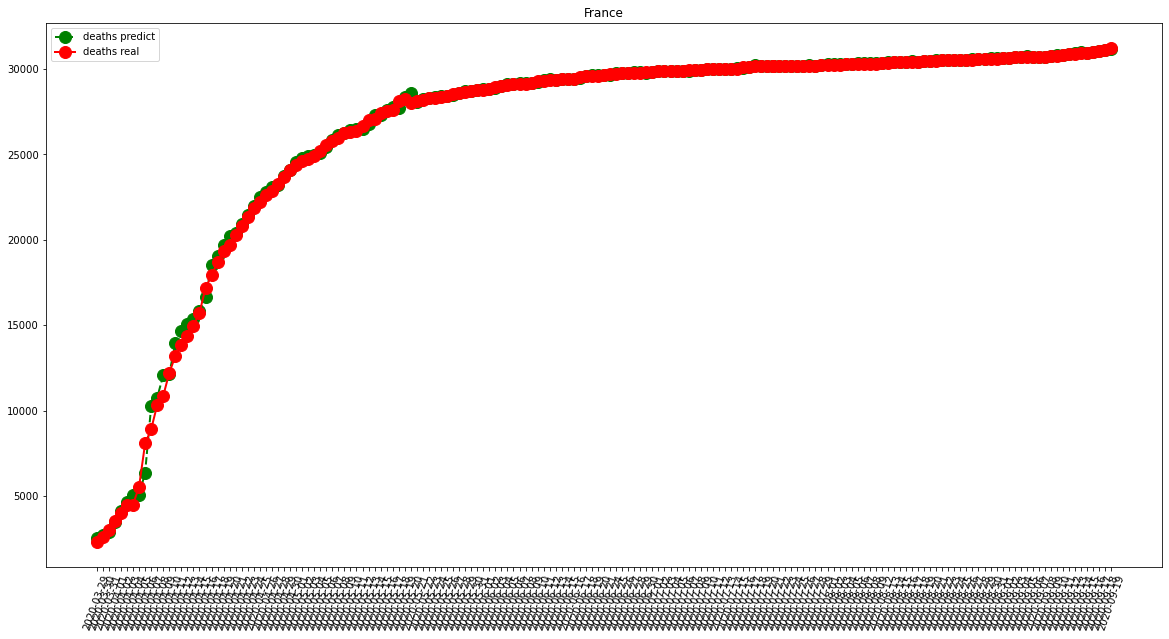

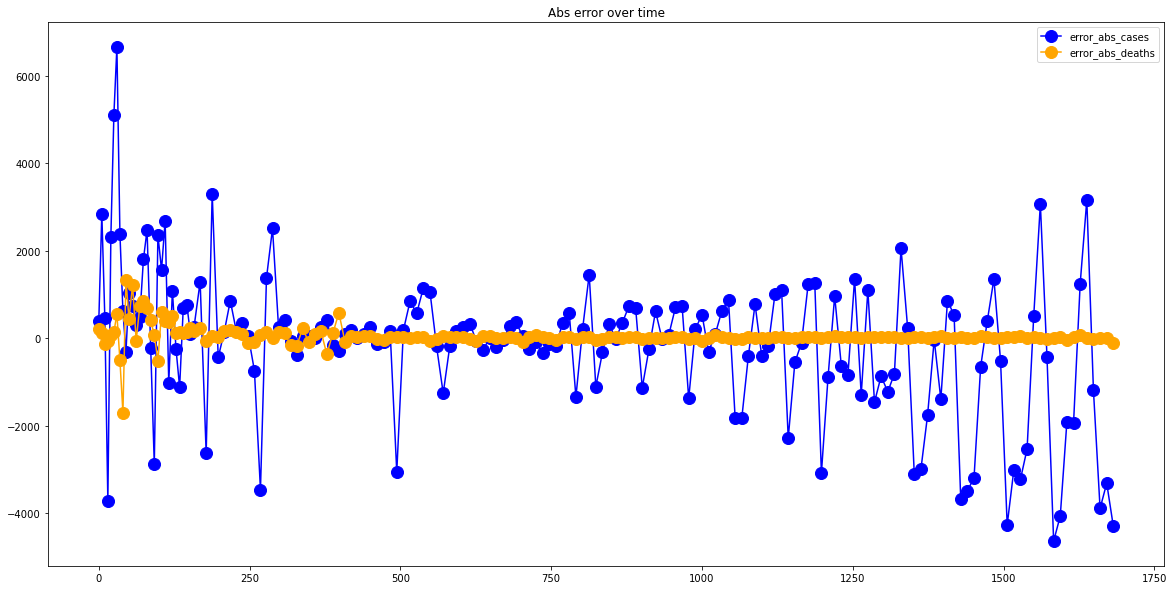

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  306.6411764705882
RMSE =  449.22719916606593
-- Italy performances for deaths --
MAE =  67.36470588235294
RMSE =  227.74567859269484


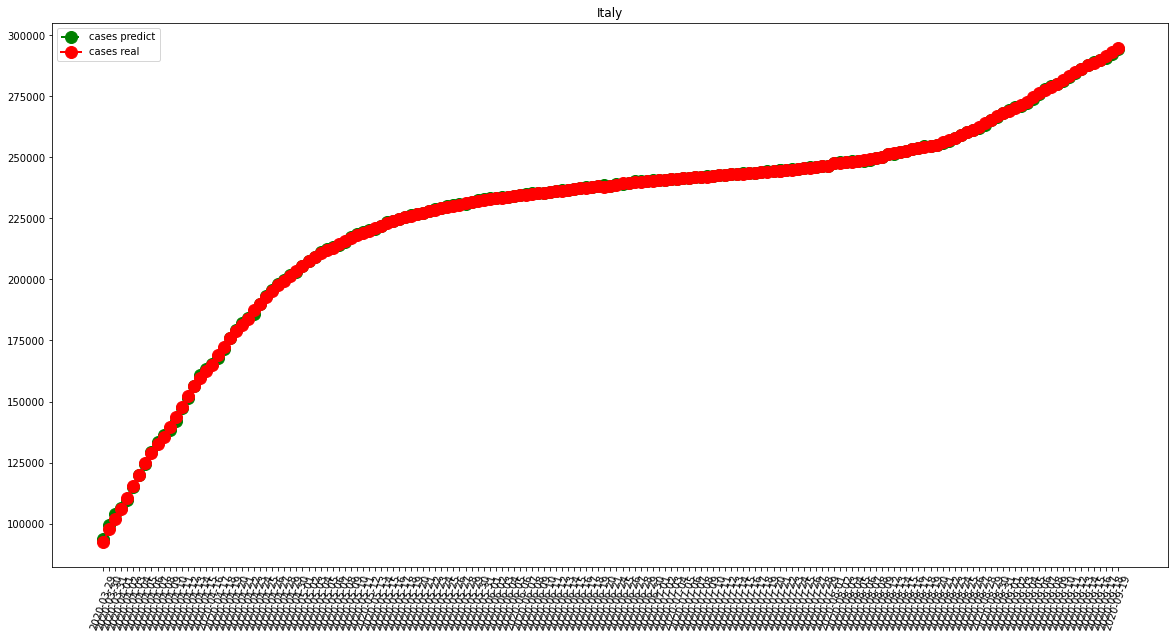

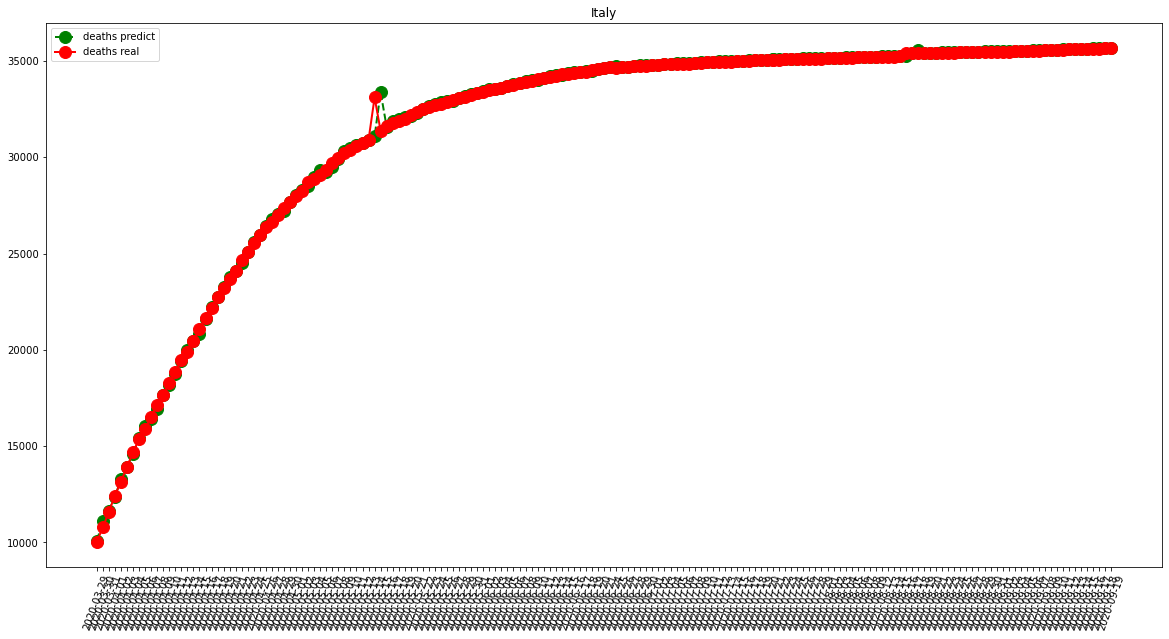

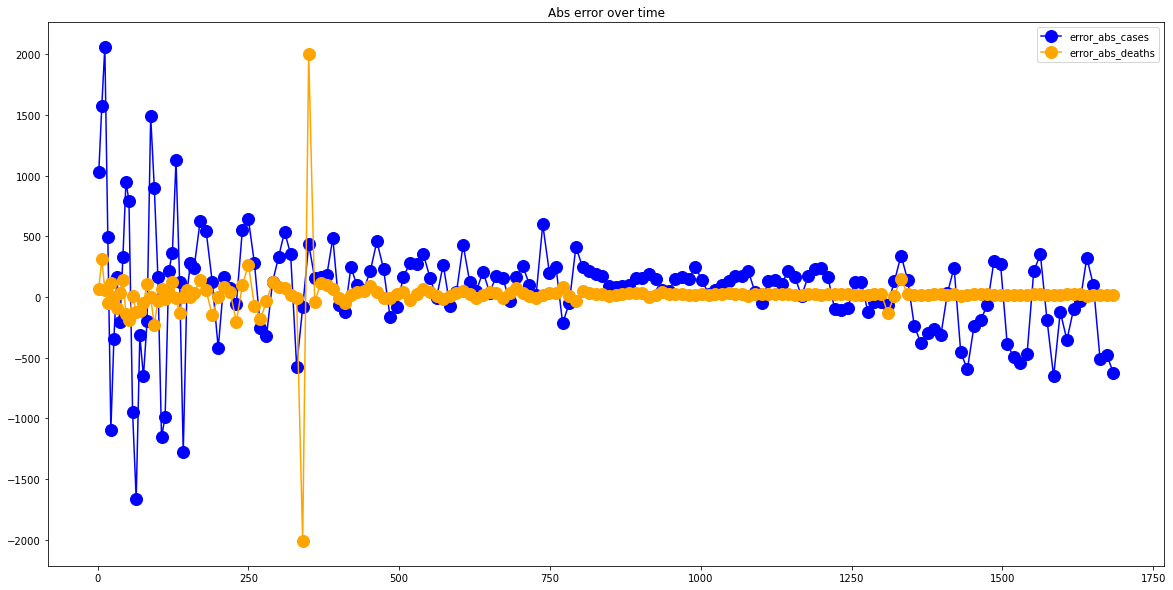

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2475.135294117647
RMSE =  4818.661260875143
-- Spain performances for deaths --
MAE =  120.32941176470588
RMSE =  312.8707682847006


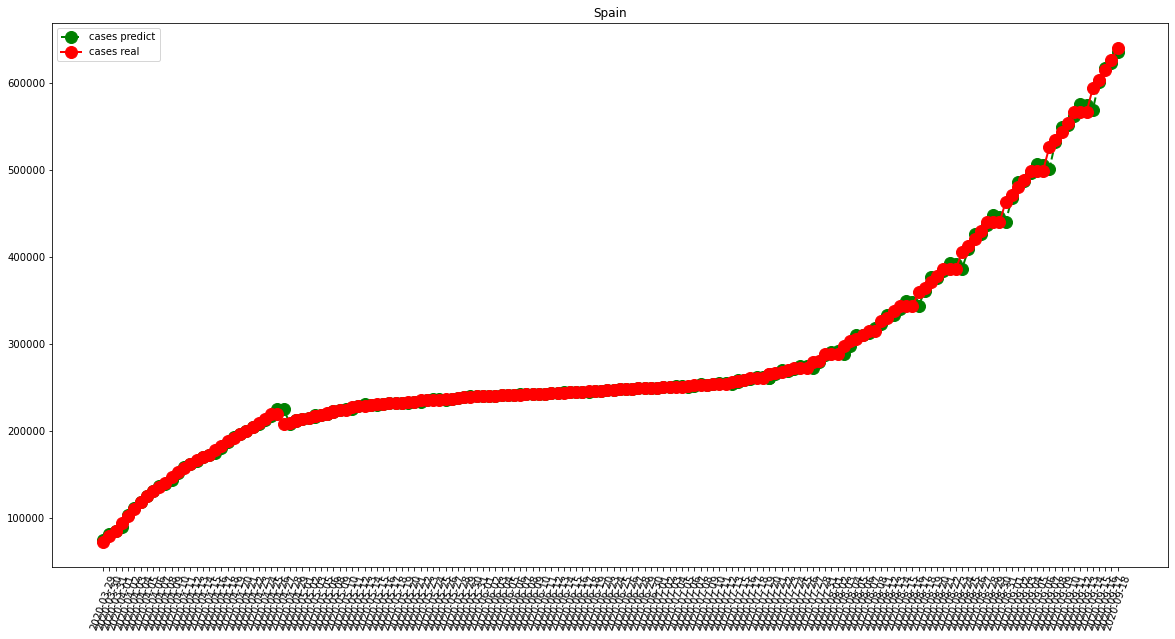

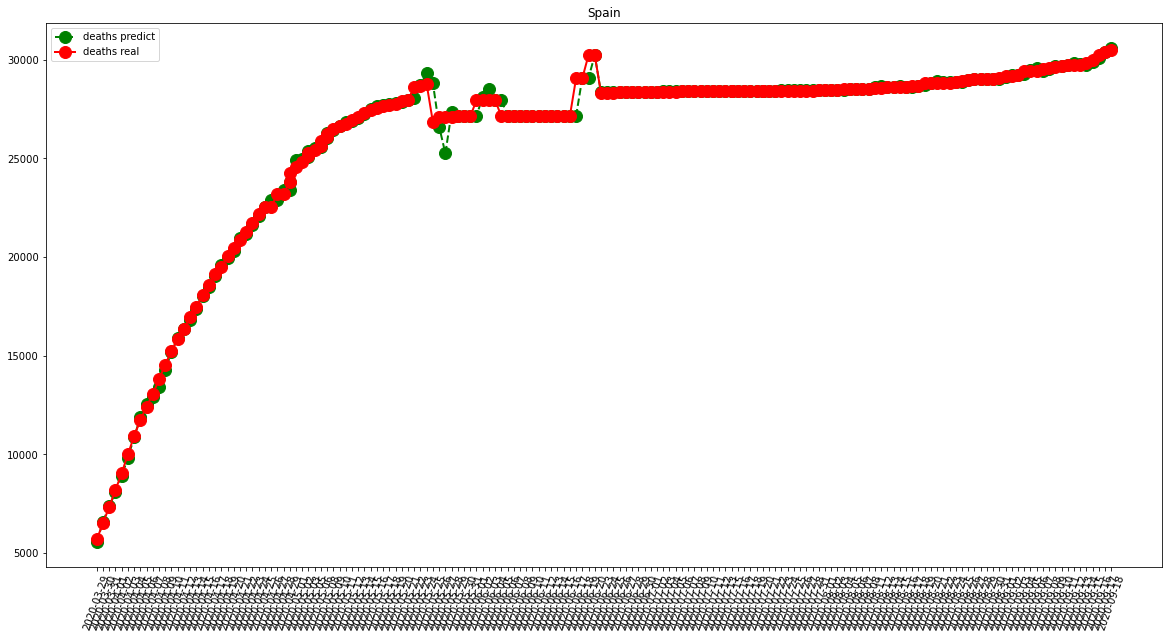

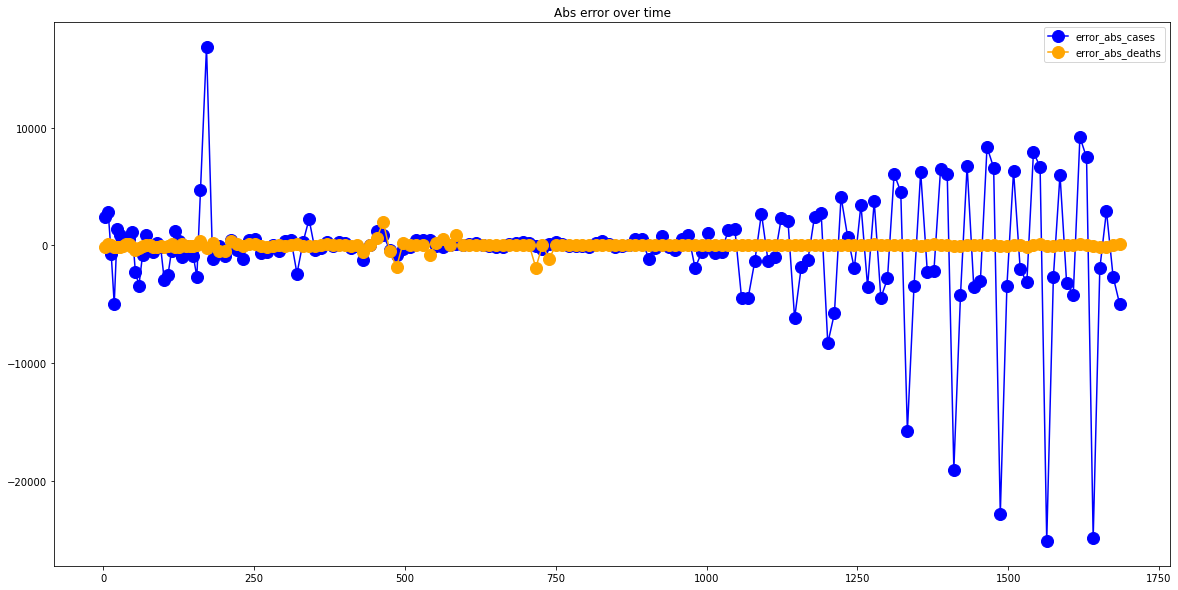

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  15336.376470588235
RMSE =  22925.840396681593
-- United States performances for deaths --
MAE =  480.47058823529414
RMSE =  673.7605177614058


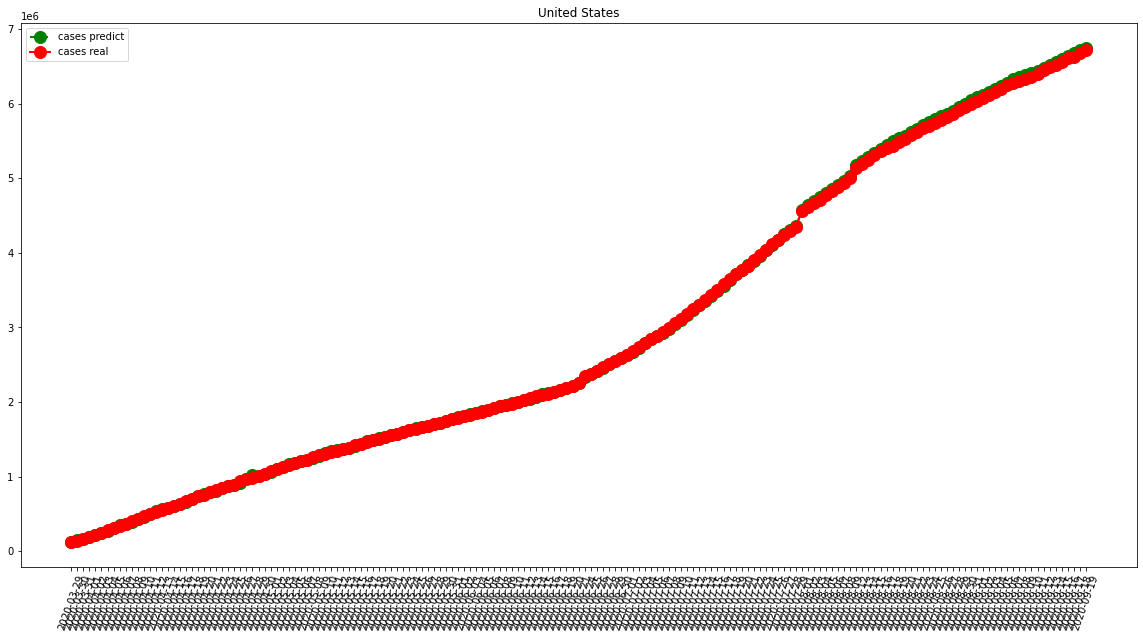

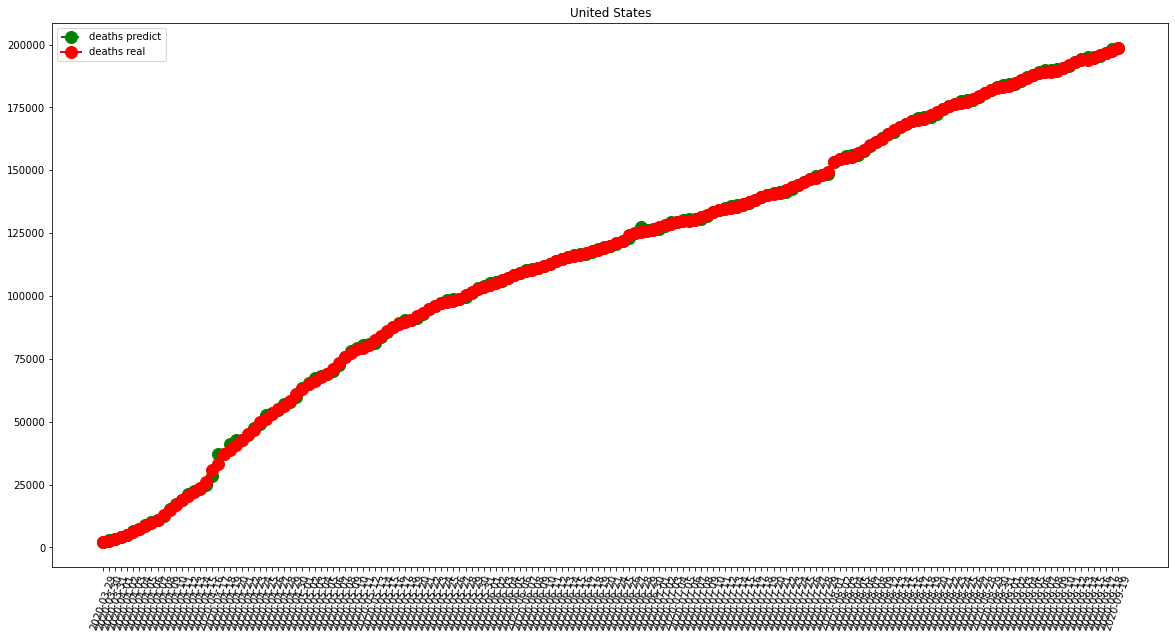

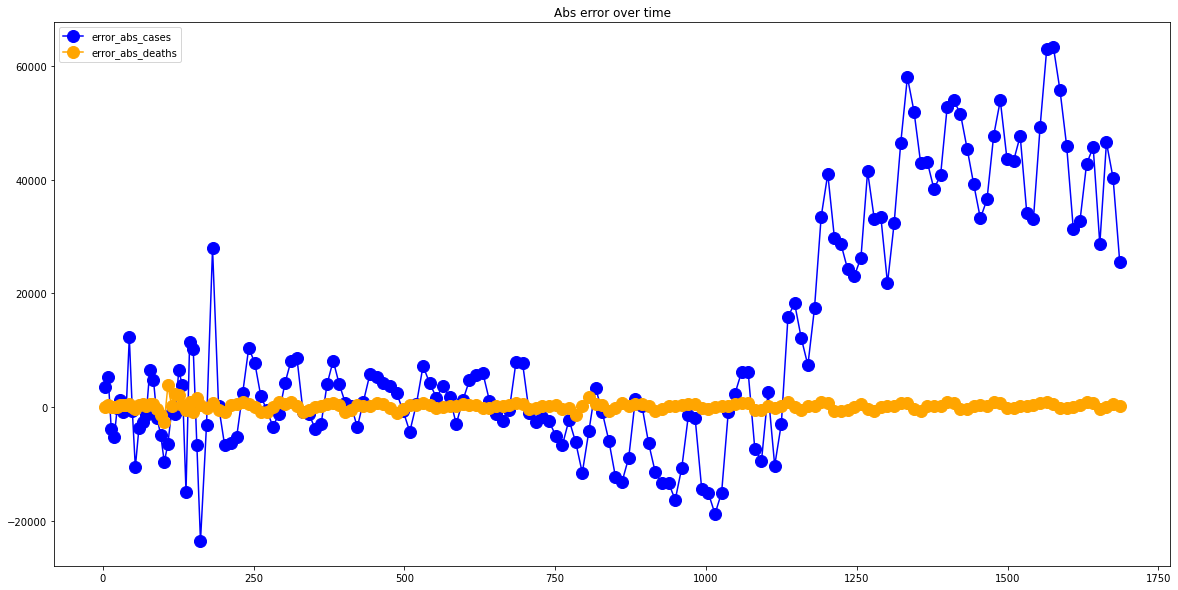

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  59.84705882352941
RMSE =  91.58538285633345
-- China performances for deaths --
MAE =  25.03529411764706
RMSE =  120.44276160703645


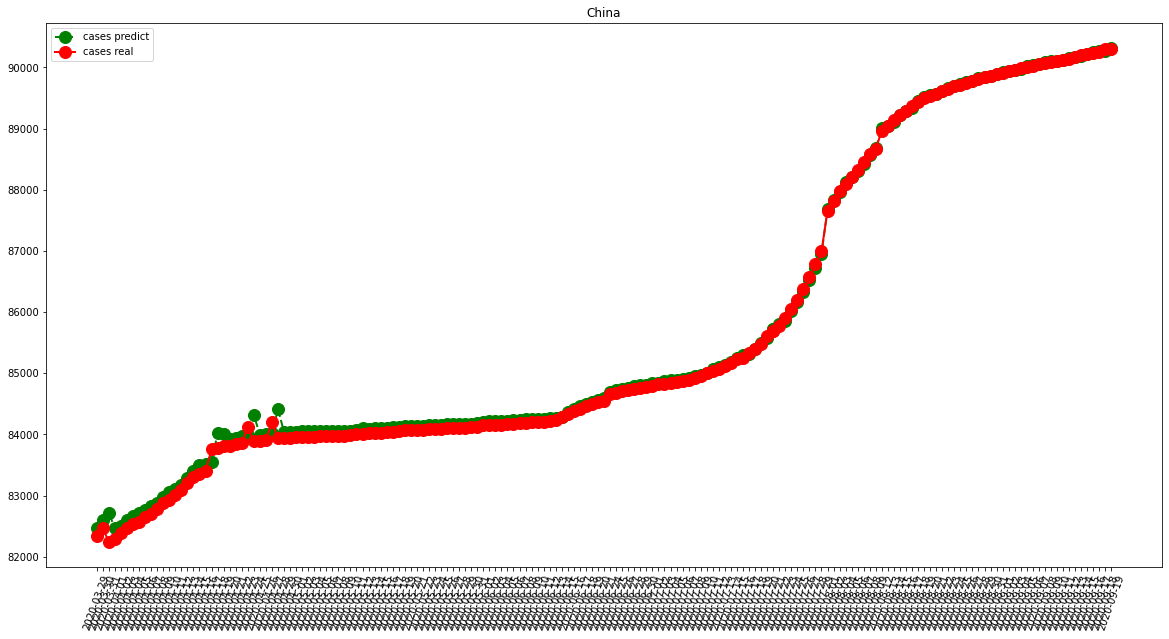

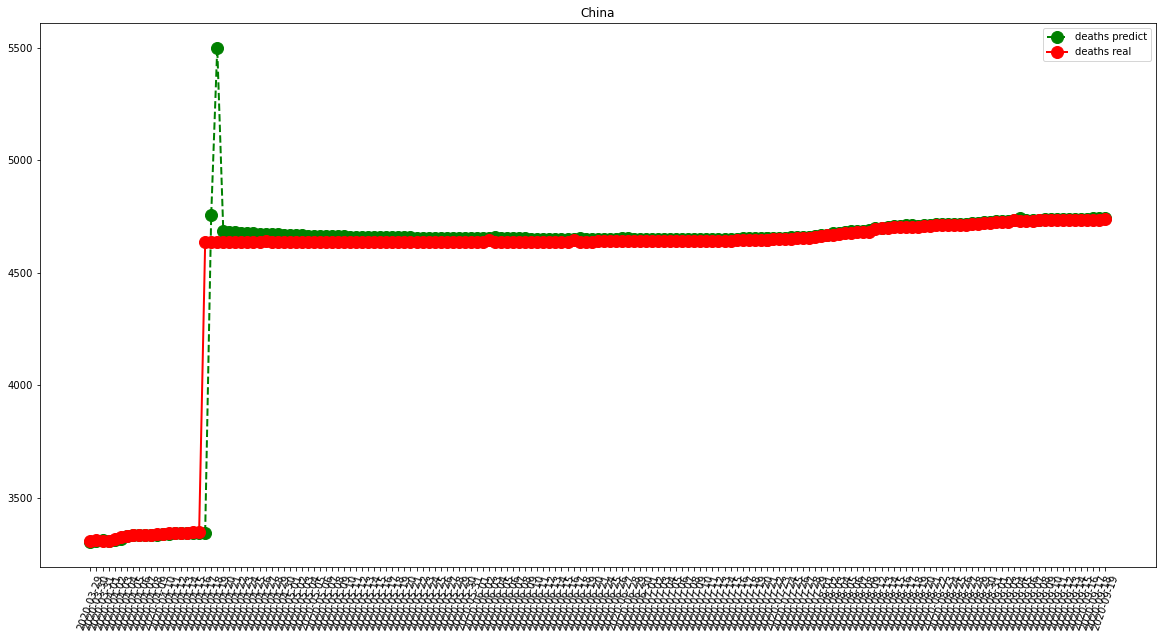

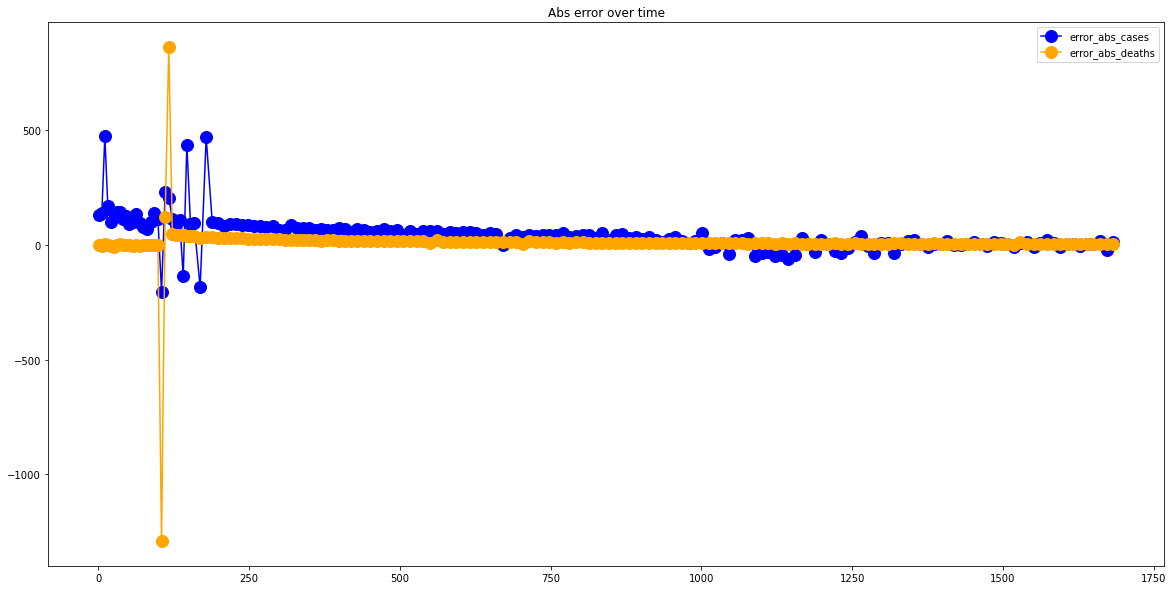

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1017.0774647887324
RMSE =  3523.5088235418775
-- United Kingdom performances for deaths --
MAE =  216.69014084507043
RMSE =  716.2533976027372


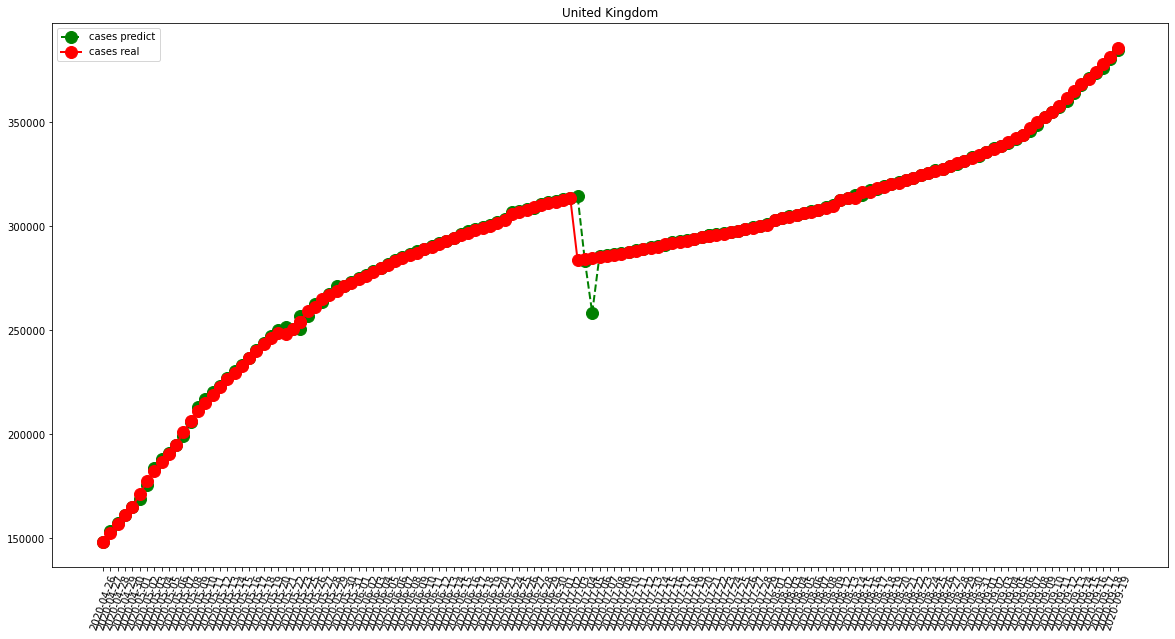

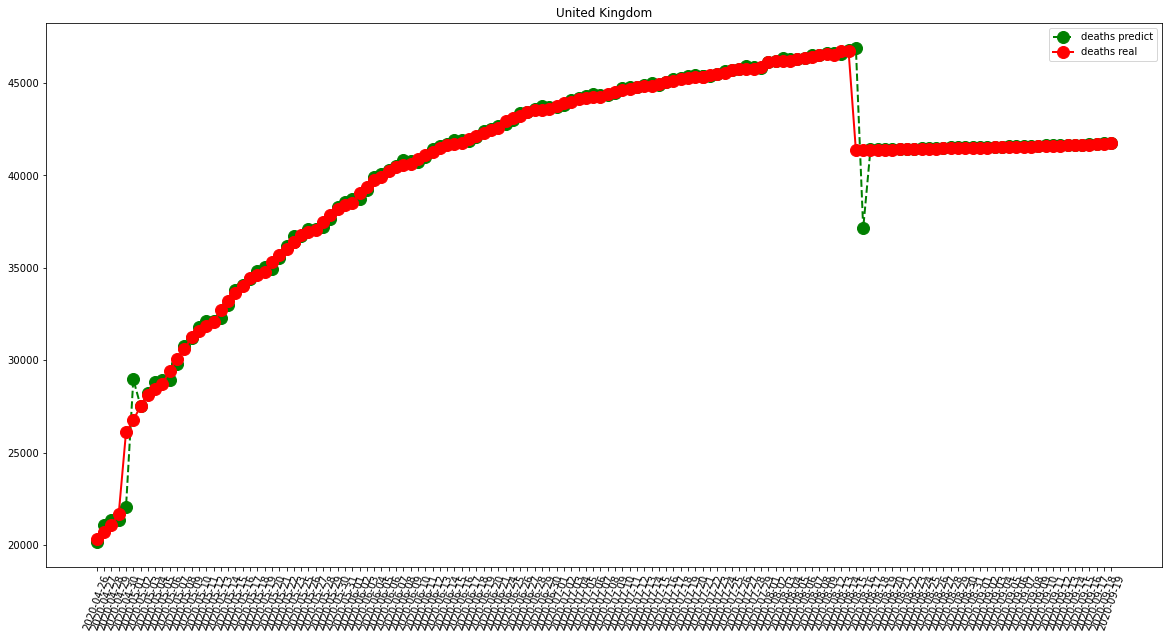

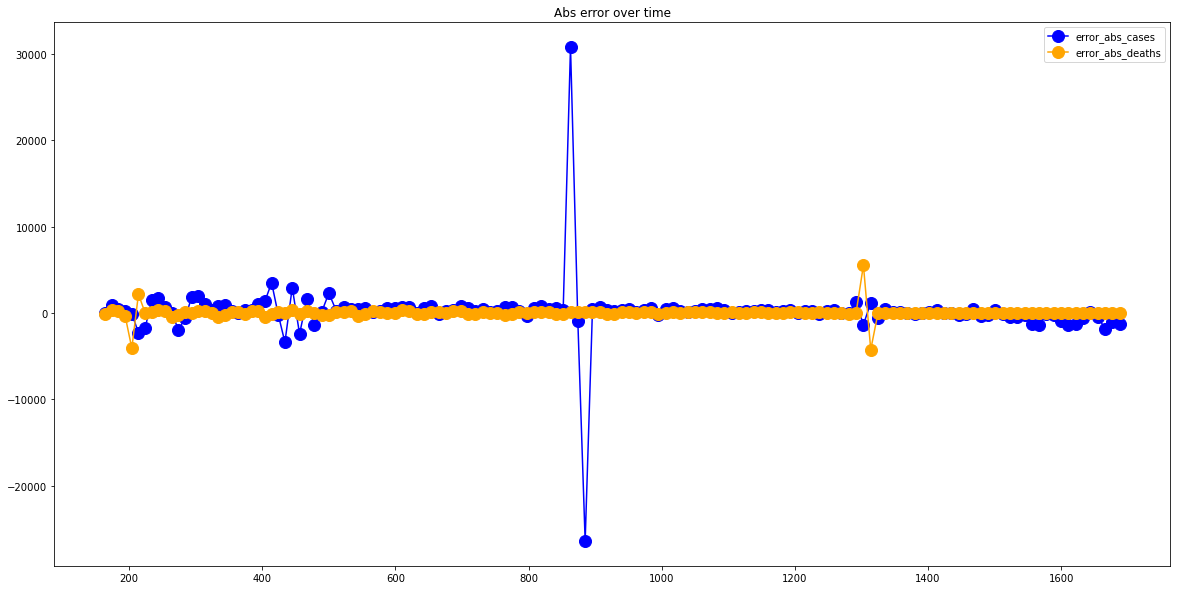

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  413.2042253521127
RMSE =  583.3289181590121
-- Germany performances for deaths --
MAE =  19.1056338028169
RMSE =  36.97001068624196


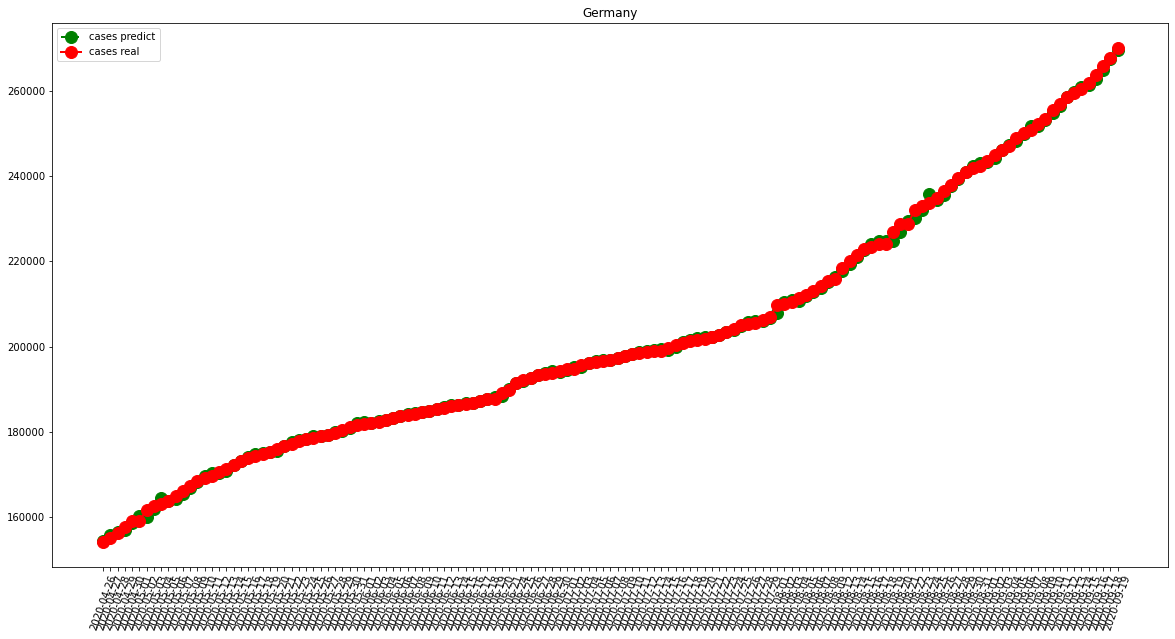

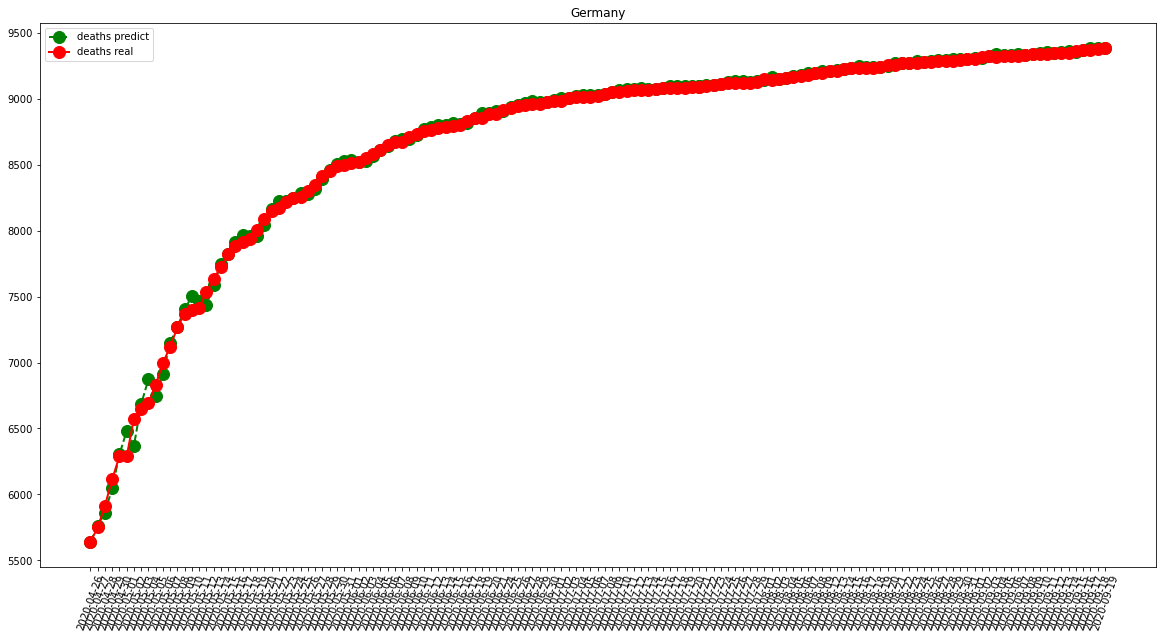

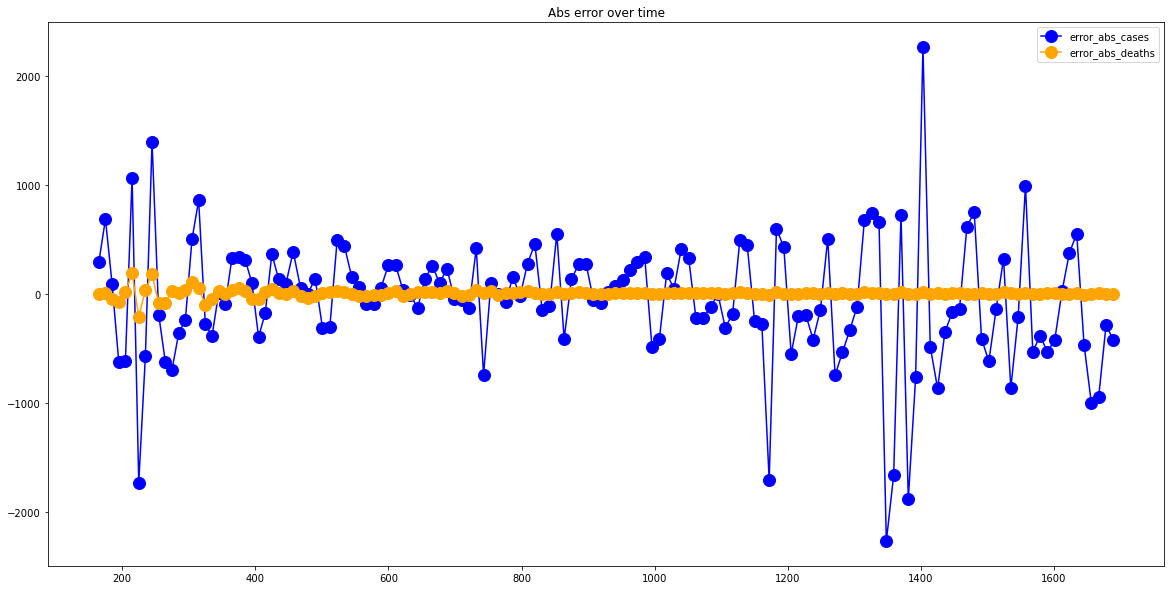

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  881.6267605633802
RMSE =  1237.4827556061277
-- Iran performances for deaths --
MAE =  51.985915492957744
RMSE =  85.80226202737364


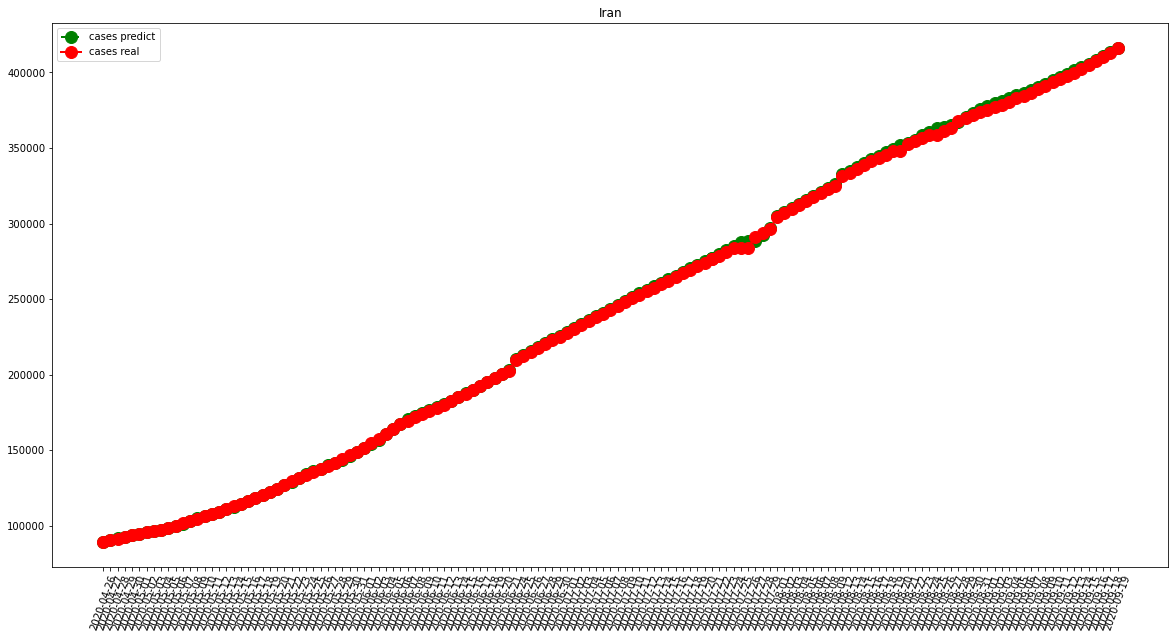

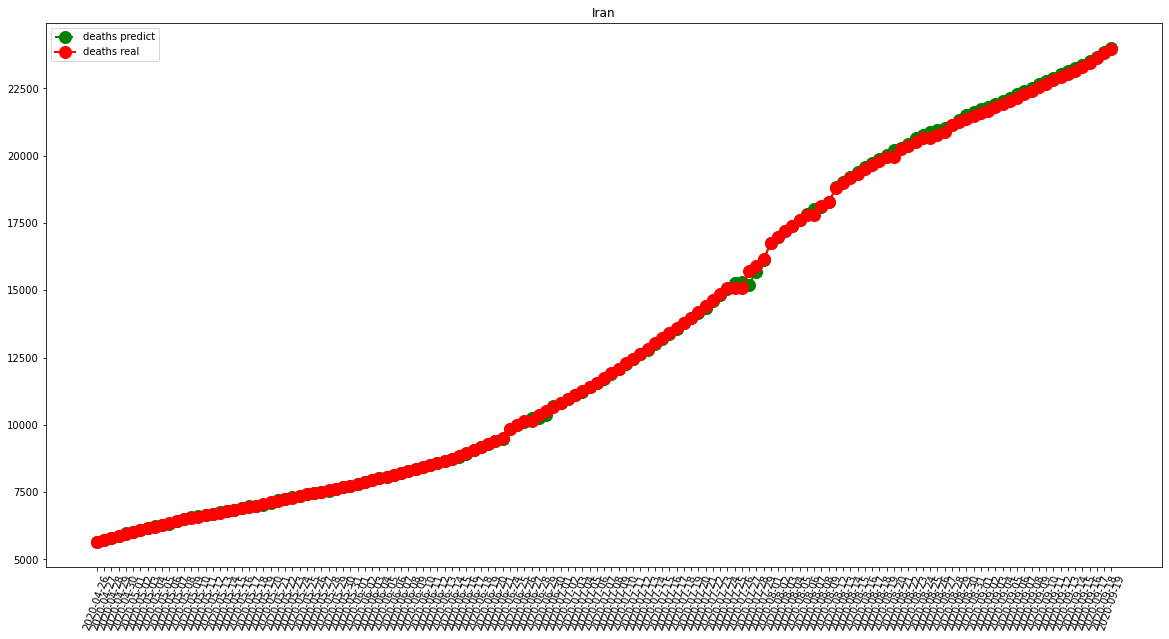

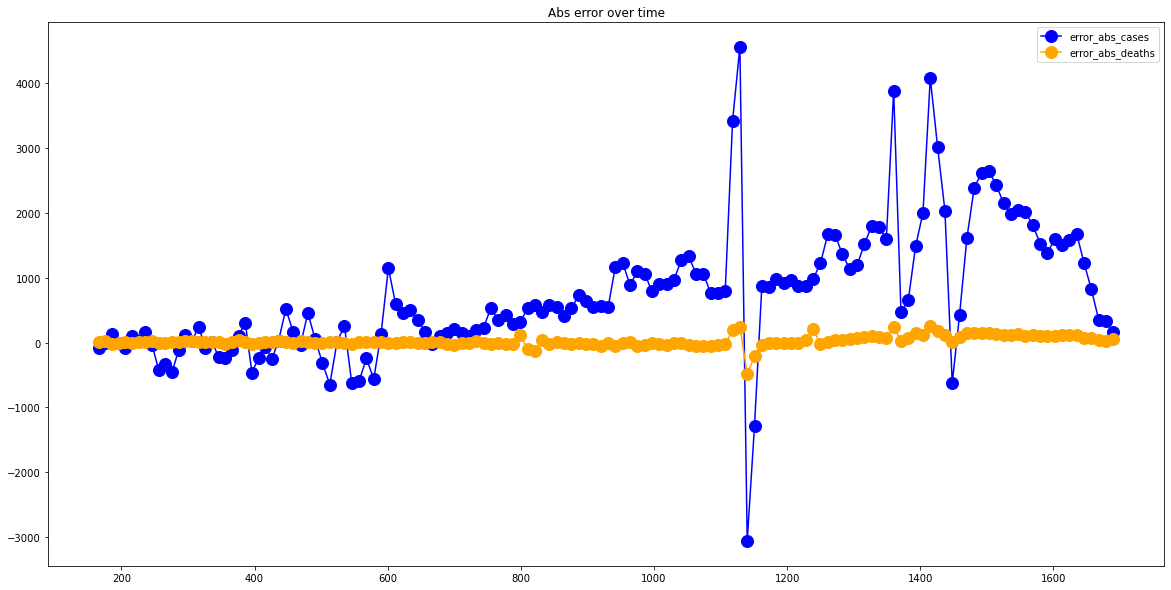

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  220.05633802816902
RMSE =  330.3410316371531
-- Turkey performances for deaths --
MAE =  15.929577464788732
RMSE =  85.38735269347563


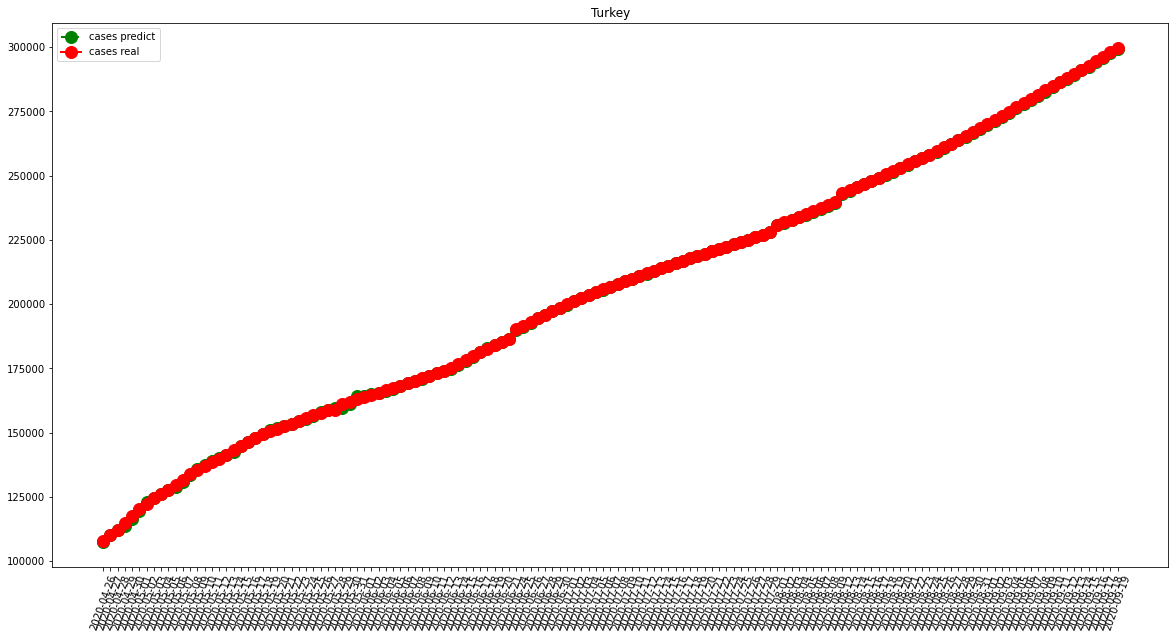

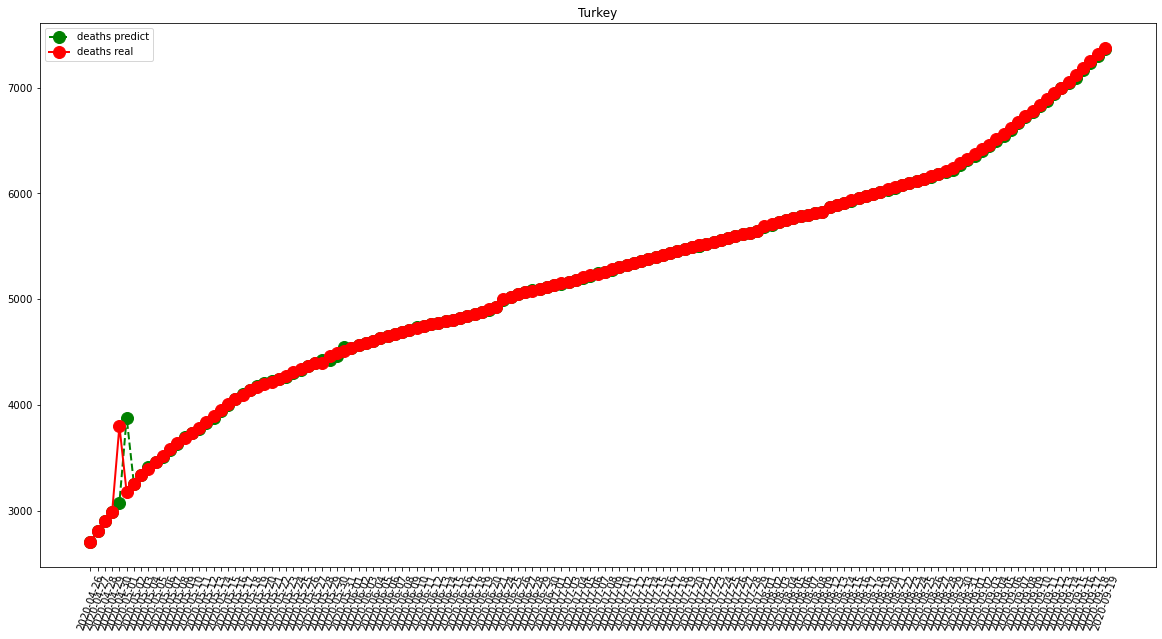

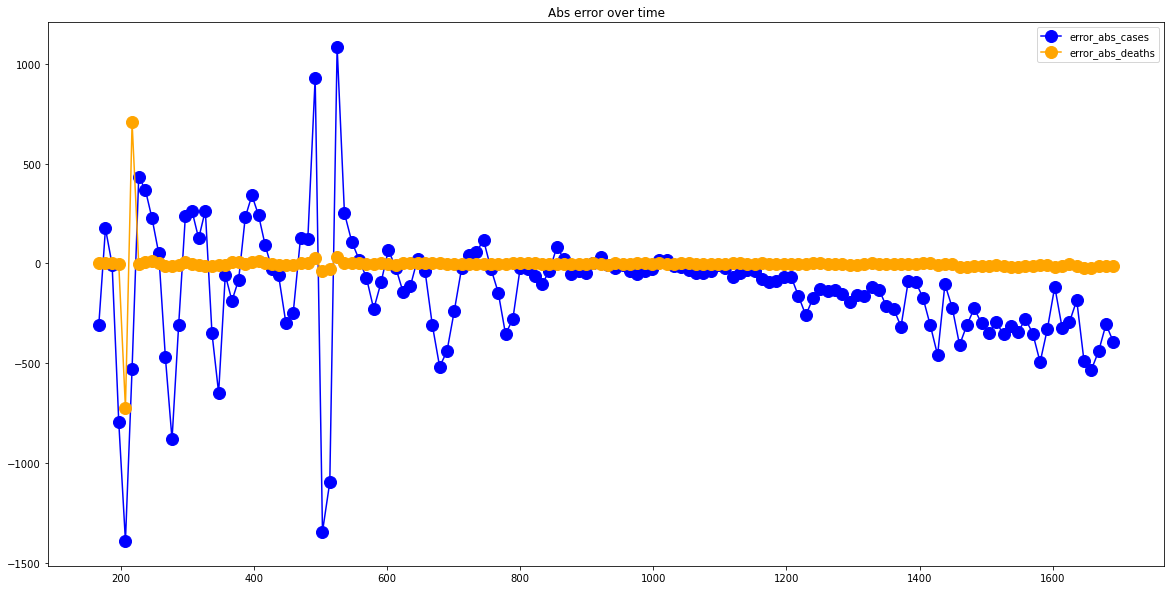

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  16050.017391304347
RMSE =  21208.77929947674
-- Brazil performances for deaths --
MAE =  479.32173913043476
RMSE =  583.57873430278


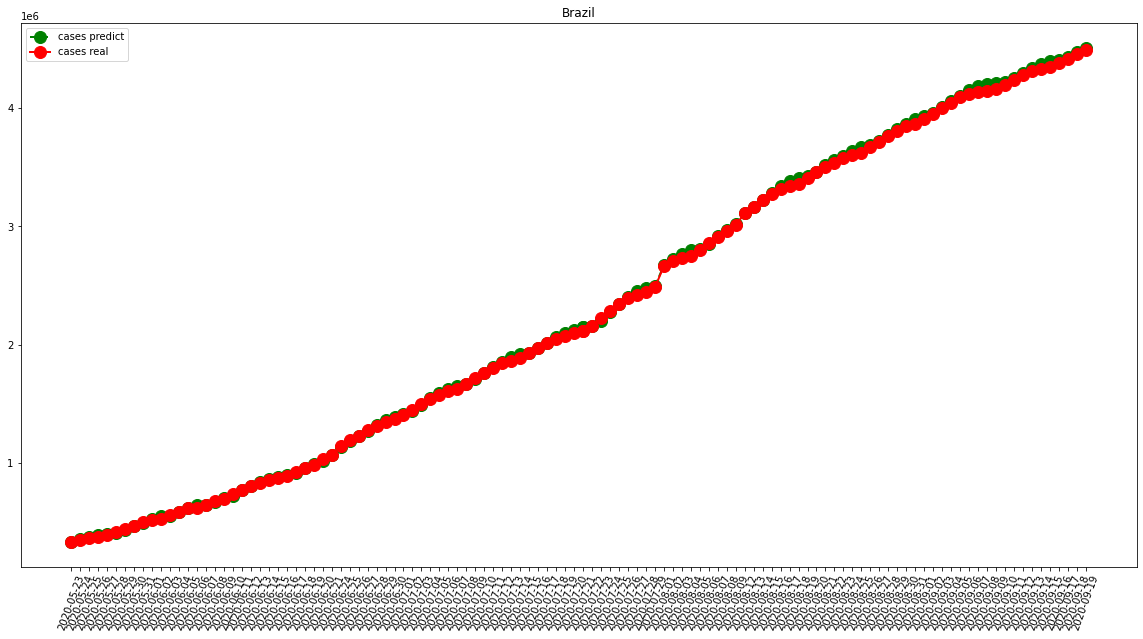

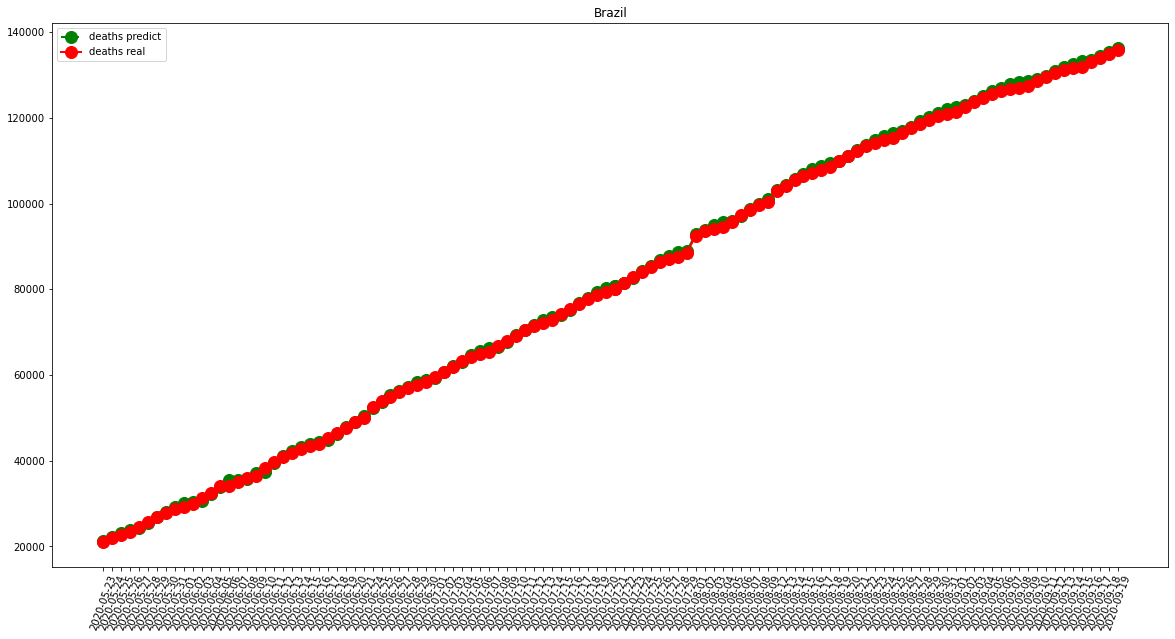

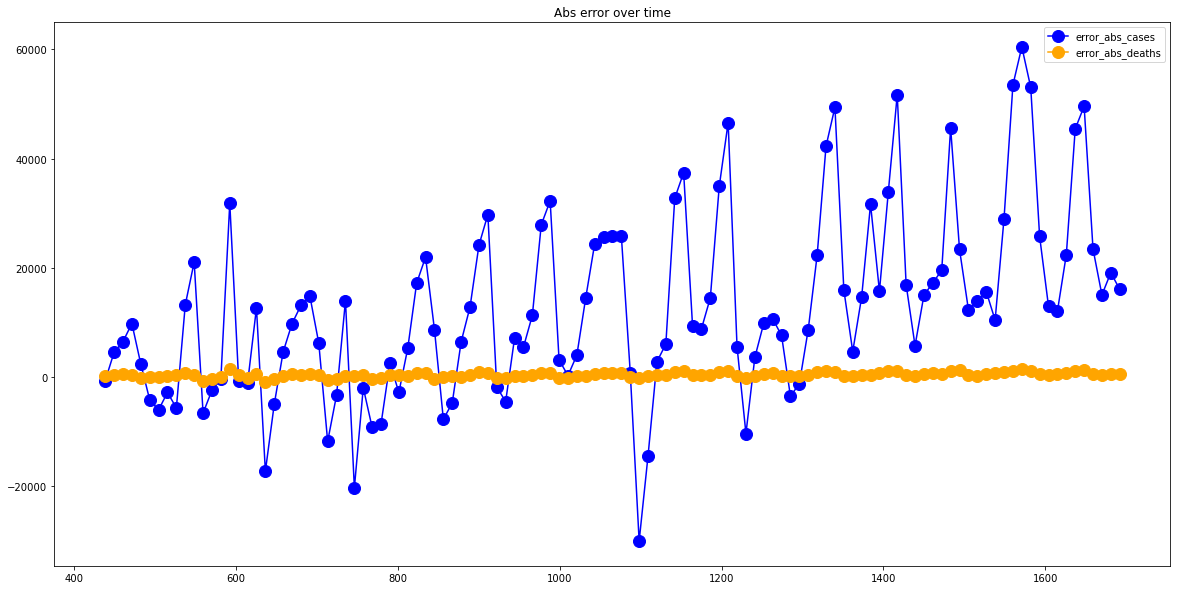

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)